In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("dataset.csv")

In [9]:
# Display the first few rows and basic info to understand the structure
data_info = data.info()
data_head = data.head()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


### Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it

In [13]:
import numpy as np

In [15]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


#### What it does:
- Counts the number of missing (NaN) values in each column using isnull().sum().

#### Why it's important:
- Helps identify columns with missing data for appropriate preprocessing.

In [17]:
# Drop rows with significant missing values or incorrect data
data_cleaned = data.dropna()

#### What it does:
- Removes all rows from the dataset that contain any missing (NaN) values using the dropna() method.

#### Why it's important:
- Ensures that the dataset only contains complete cases, which is crucial for accurate analysis and modeling. \
- Removing incomplete data helps prevent errors and biases that can arise from handling missing values improperly.

In [21]:
# Check for duplicates
duplicates = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

Number of duplicate rows: 0


#### What it does:
- Identifies and counts the number of duplicate rows in the data_cleaned DataFrame using the duplicated() method followed by sum().

#### Why it's important:
- Duplicates can skew analysis results and lead to inaccurate conclusions. \
- Identifying duplicates allows for their removal, ensuring the dataset's integrity and reliability.

In [35]:
# Apply the conditional replacement only to numeric columns
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns

# Replace negative values in numeric columns with NaN
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].applymap(lambda x: x if x > 0 else np.nan)

# Fill NaN values in numeric columns with column means
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Verify cleaning
print("Dataset after cleaning:")
print(data_cleaned.info())
print(data_cleaned.head())

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            323 non-null    object 
 1   island             323 non-null    object 
 2   bill_length_mm     323 non-null    float64
 3   bill_depth_mm      323 non-null    float64
 4   flipper_length_mm  323 non-null    float64
 5   body_mass_g        323 non-null    float64
 6   sex                323 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.2+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torger

C:\Users\premi\AppData\Local\Temp\ipykernel_15652\3314060219.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned[numeric_cols] = data_cleaned[numeric_cols].applymap(lambda x: x if x > 0 else np.nan)


- Identify Numerical Columns: Selects numeric columns for targeted cleaning.
- Handle Invalid Values: Replaces negative values with NaN to address invalid data.
- Impute Missing Values: Fills NaN in numeric columns with their respective column means.
- Verify Cleaned Data: Prints dataset structure and a preview to confirm successful cleaning.

### Q2: What is the average body_mass_g for Gentoo penguins? 

In [105]:
# Calculate the average body_mass_g for Gentoo penguins
gentoo_avg_body_mass = data[data['species'] == 'Gentoo']['body_mass_g'].mean()

print(f"Average body_mass_g for Gentoo penguins: {gentoo_avg_body_mass}")

Average body_mass_g for Gentoo penguins: 5133.739837398374


### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.

In [44]:
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Calculate skewness and kurtosis
species_groups = data_cleaned.groupby('species')
distribution_analysis = {}

for feature in ['bill_length_mm', 'bill_depth_mm']:
    distribution_analysis[feature] = species_groups[feature].agg(['mean', 'std', skew, kurtosis])

# Print skewness and kurtosis
for feature, analysis in distribution_analysis.items():
    print(f"--- Analysis for {feature} ---")
    print(analysis)

--- Analysis for bill_length_mm ---
                mean       std      skew  kurtosis
species                                           
Adelie     38.787586  2.635149  0.147856 -0.146778
Chinstrap  48.831818  3.354453 -0.089546 -0.031772
Gentoo     47.603571  3.128996  0.642346  1.161794
--- Analysis for bill_depth_mm ---
                mean       std      skew  kurtosis
species                                           
Adelie     18.349655  1.223220  0.304963 -0.092342
Chinstrap  18.395455  1.128298  0.002886 -0.901111
Gentoo     14.991964  0.993142  0.324562 -0.586759


This code calculates and displays key statistical metrics for bill_length_mm and bill_depth_mm grouped by species:

- Group Data: Groups the cleaned dataset (data_cleaned) by the species column.
- Metrics: Calculates the mean, standard deviation (std), skewness, and kurtosis for each feature within each species group.
- Output: Prints the calculated metrics for each feature in a clean format.
- This analysis provides insights into the central tendency, spread, and shape (skewness and kurtosis) of the distributions for each feature across species.

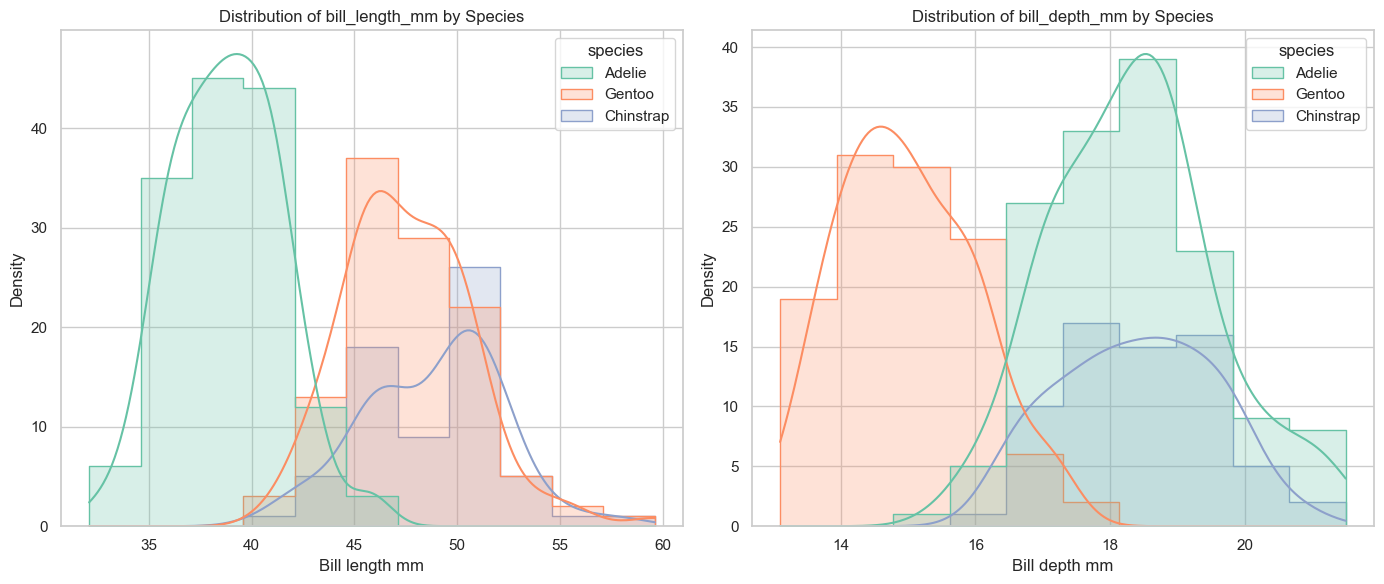

In [135]:
# Plot distributions
plt.figure(figsize=(14,6))

for i, feature in enumerate(['bill_length_mm', 'bill_depth_mm'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=data_cleaned, x=feature, hue='species', kde=True, element="step", palette="Set2")
    plt.title(f'Distribution of {feature} by Species')
    plt.xlabel(feature.replace("_", " ").capitalize())
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

The code visualizes the distributions of bill_length_mm and bill_depth_mm for different penguin species:
- Setup: Creates a figure with 2 subplots, one for each feature.
- Histogram & KDE: Plots histograms with KDE curves for smooth visualization, grouped by species (hue='species').
- Aesthetics: Adds titles, formatted axis labels, and uses distinct colors (palette="Set2").
- Layout: Ensures proper spacing with plt.tight_layout().

### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliersvisualize the outliers.

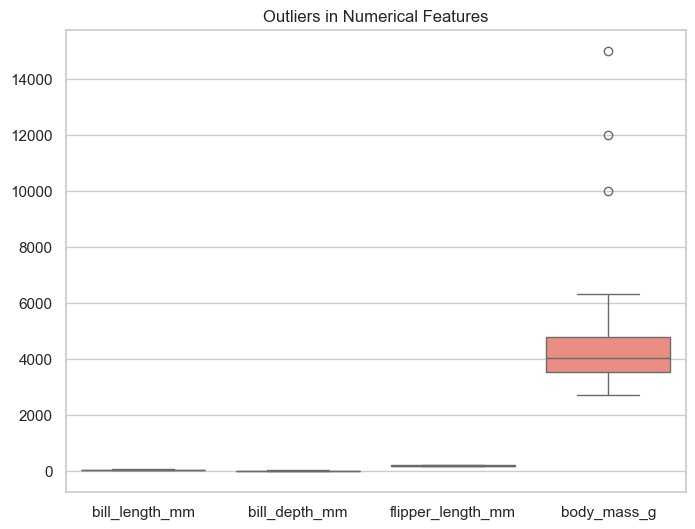

Outliers detected in bill_length_mm: 0 indices
Outliers detected in bill_depth_mm: 0 indices
Outliers detected in flipper_length_mm: 0 indices
Outliers detected in body_mass_g: 3 indices


In [160]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using the IQR method to detect outliers
outlier_indices = {}
for col in numeric_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices[col] = data_cleaned[(data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)].index

# Visualizing outliers with boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned[numeric_cols], palette="Set3")
plt.title("Outliers in Numerical Features")
plt.show()

# Print outlier indices for each column
for col, indices in outlier_indices.items():
    print(f"Outliers detected in {col}: {len(indices)} indices")


#### What it does
- Detects Outliers: Uses the IQR method to identify extreme values in numerical features by calculating the lower and upper bounds for outliers.
- Stores Outlier Indices: Captures the indices of the detected outliers for each column, enabling targeted inspection or action.
- Visualizes Outliers: Generates a boxplot to show the distribution of numeric features and highlights potential outliers.
- Counts Outliers: Prints the total number of outliers for each column, giving a clear picture of data irregularities.


### Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

1. Standardizing the Features:

- Why : Standardization is the process of scaling the numerical data so that each feature has a mean of 0 and a standard deviation of 1. This step is important because PCA is sensitive to the scale of the data. Without standardization, features with larger scales could dominate the principal components.
- What: The StandardScaler is used to standardize the numerical columns in the dataset (numeric_cols). The fit_transform() method computes the mean and standard deviation of each feature and scales the data accordingly.
2. Applying PCA:

- Why: PCA is a technique used to reduce the dimensionality of the dataset while preserving as much variance (information) as possible. It transforms the original features into new, uncorrelated variables called principal components.
- What: The PCA() object is used to apply PCA to the standardized data. The fit_transform() method performs the transformation, and pca_data stores the transformed data with reduced dimensions.
3. Explained Variance:

- Why: The explained variance tells us how much of the total variance (or information) in the original data is captured by each principal component. This is crucial for understanding how many components are needed to explain most of the data's variability.
- What: The explained_variance_ratio_ attribute of the pca object shows the proportion of variance explained by each principal component. The cumsum() method calculates the cumulative explained variance, showing how much variance is captured by the first few components together.

4. Ouput:  The output prints two things:
- Explained Variance Ratio: The proportion of variance captured by each principal component.
- Cumulative Variance Ratio: The cumulative sum of the explained variance ratios, which tells you how much of the total variance is explained by the first N components.

In [60]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[numeric_cols])

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Determine the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance Ratio:", cumulative_variance)


Explained Variance Ratio: [0.61557234 0.19748104 0.13393102 0.0530156 ]
Cumulative Variance Ratio: [0.61557234 0.81305338 0.9469844  1.        ]


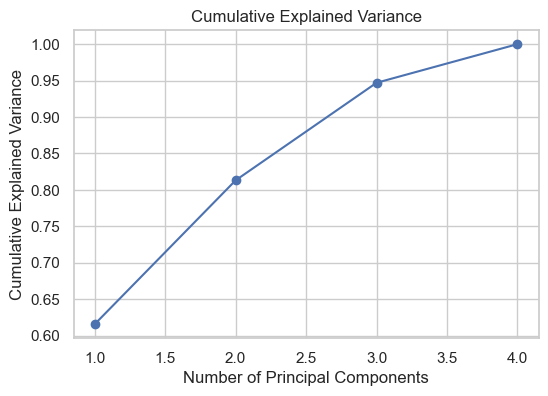

In [218]:
# Plot cumulative variance
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

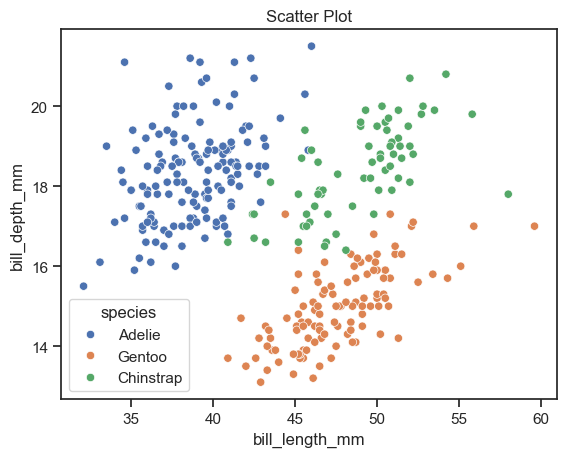

In [67]:
# Pairplot and different scatter plots
sns.set(style="ticks")

# 1. Scatter plot
sns.scatterplot(data=data_cleaned, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Scatter Plot")
plt.show()


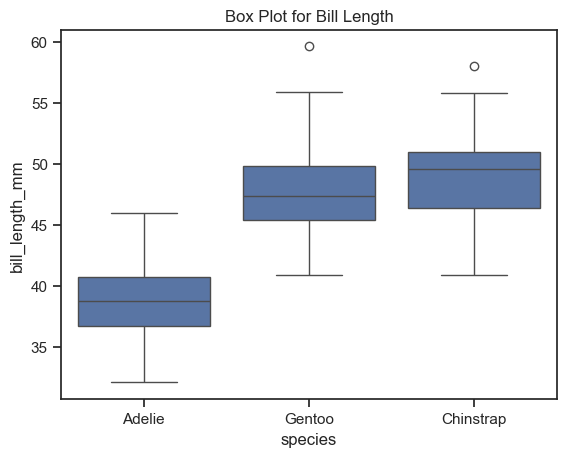

In [69]:
# 2. Boxplot
sns.boxplot(data=data_cleaned, x="species", y="bill_length_mm")
plt.title("Box Plot for Bill Length")
plt.show()

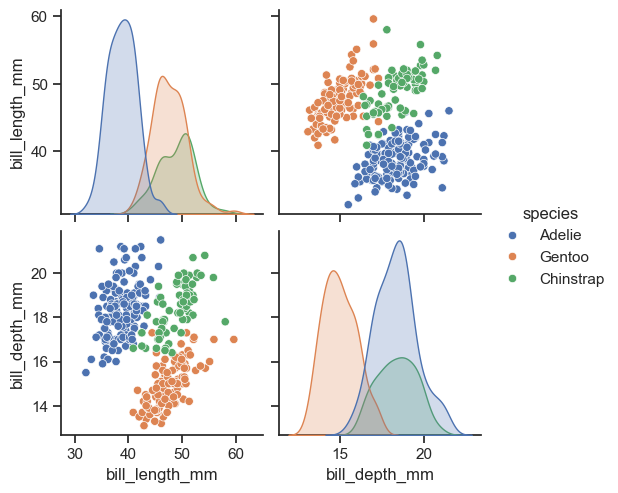

In [71]:
# 3. Pairplot
sns.pairplot(data_cleaned, hue="species", vars=["bill_length_mm", "bill_depth_mm"])
plt.show()

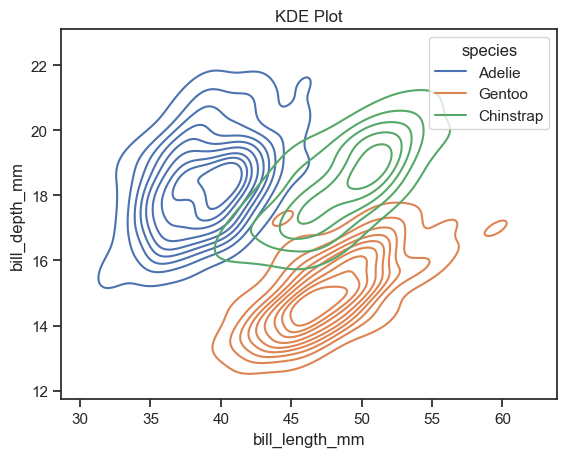

In [73]:
# 4. KDE plot
sns.kdeplot(data=data_cleaned, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("KDE Plot")
plt.show()


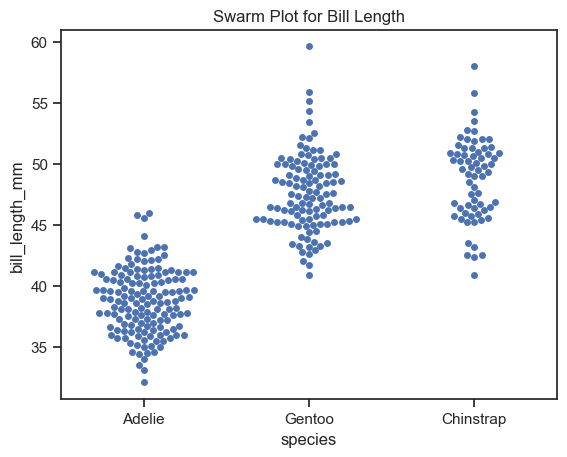

In [75]:
# 5. Swarm plot
sns.swarmplot(data=data_cleaned, x="species", y="bill_length_mm")
plt.title("Swarm Plot for Bill Length")
plt.show()

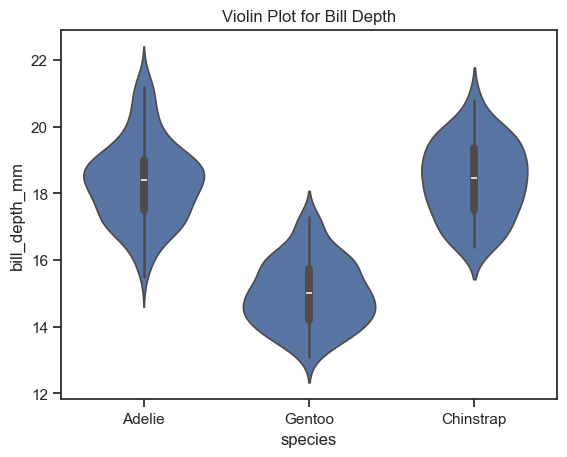

In [77]:
# 6. Violin plot
sns.violinplot(data=data_cleaned, x="species", y="bill_depth_mm")
plt.title("Violin Plot for Bill Depth")
plt.show()

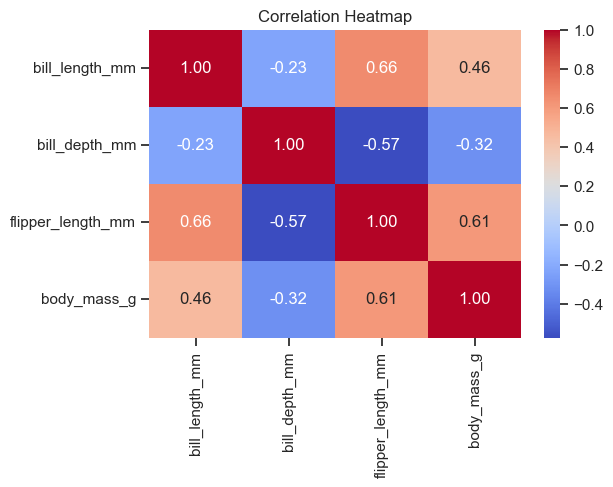

In [83]:
# Select only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data_cleaned[numeric_columns].corr()

# Visualize the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [86]:
# Group by species and island and find max flipper_length_mm
max_flippers = data_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max()
print("Maximum flipper lengths:")
print(max_flippers)

Maximum flipper lengths:
species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    202.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [88]:
# Which species has the longest flippers on each island
longest_flippers = max_flippers.reset_index().sort_values(by='flipper_length_mm', ascending=False).drop_duplicates(['island'])
print("Species with the longest flippers on each island:")
print(longest_flippers)

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              202.0


### Q8: Perform z-score normalization on this dataset. 

In [91]:
from scipy.stats import zscore

In [93]:
# Apply Z-score normalization
normalized_data = data_cleaned.copy()
for col in numeric_cols:
    normalized_data[col] = zscore(data_cleaned[col])

In [95]:
# Verify normalization
print("First few rows of normalized data:")
print(normalized_data.head())

First few rows of normalized data:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.873115       0.768343          -1.415643   
1  Adelie  Torgersen       -0.800309       0.104774          -1.056111   
2  Adelie  Torgersen       -0.654696       0.411037          -0.408954   
4  Adelie  Torgersen       -1.309955       1.074606          -0.552767   
5  Adelie  Torgersen       -0.836712       1.738175          -0.768486   

   body_mass_g     sex  
0    -0.459514    male  
1    -0.415366  female  
2    -0.900986  female  
4    -0.724397  female  
5    -0.547808    male  
